<a href="https://colab.research.google.com/github/camilalarrosa/study_cases_for_data_analysis/blob/main/per_capita_income_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjunto de dados Economicos do Brasil** <p>
Dados da renda per capita dos estados da união <p>

link oficial dos dados: http://www.atlasbrasil.org.br/ <p>

**O que é Renda Per Capita?** <p>
A renda per capita é um dos indicadores socioeconômicos que avaliam o grau de desenvolvimento econômico de um determinado lugar. A média é obtida através da divisão do Produto Nacional Bruto (PNB) pelo número total de habitantes.

**Base de Dados para Download** <p>
[Download no Driver](https://docs.google.com/spreadsheets/d/1ieIQN3UjtkYwayuAusZAgvBdR-SXlL1L/edit?usp=sharing&ouid=101707831224147120634&rtpof=true&sd=true)

In [1]:
# Bibliotecas
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lendo a base de dados
Base_Dados = pd.read_excel('/content/sample_data/Dados_Pib.xlsx')

# Verificando
Base_Dados.head(10)

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
5,Bahia,2013,11.40
6,Ceará,2013,10.40
7,Distrito Federal,2013,52.77
8,Espírito Santo,2013,25.56
9,Goiás,2013,19.68


In [4]:
Base_Dados.groupby(by=['Territorialidades']).mean()

,Ano,PIB per capita
Territorialidades,,
Acre,2014.5,12.3000
Alagoas,2014.5,9.7400
Amapá,2014.5,13.4500
Amazonas,2014.5,16.6250
Bahia,2014.5,11.4825
Brasil,2014.5,21.5000
Ceará,2014.5,10.6150
Distrito Federal,2014.5,53.2925
Espírito Santo,2014.5,23.0025


In [5]:
# Agrupando por território e por ano
Base_Dados.groupby( by=['Territorialidades', 'Ano'] ).mean()

PIB per capita
Territorialidades Ano                 
Acre              2013           12.37
                  2014           13.41
                  2015           12.24
                  2016           11.18
Alagoas           2013            9.45
...                                ...
São Paulo         2016           30.24
Tocantins         2013           13.47
                  2014           13.77
                  2015           13.79
                  2016           13.68

[112 rows x 1 columns]

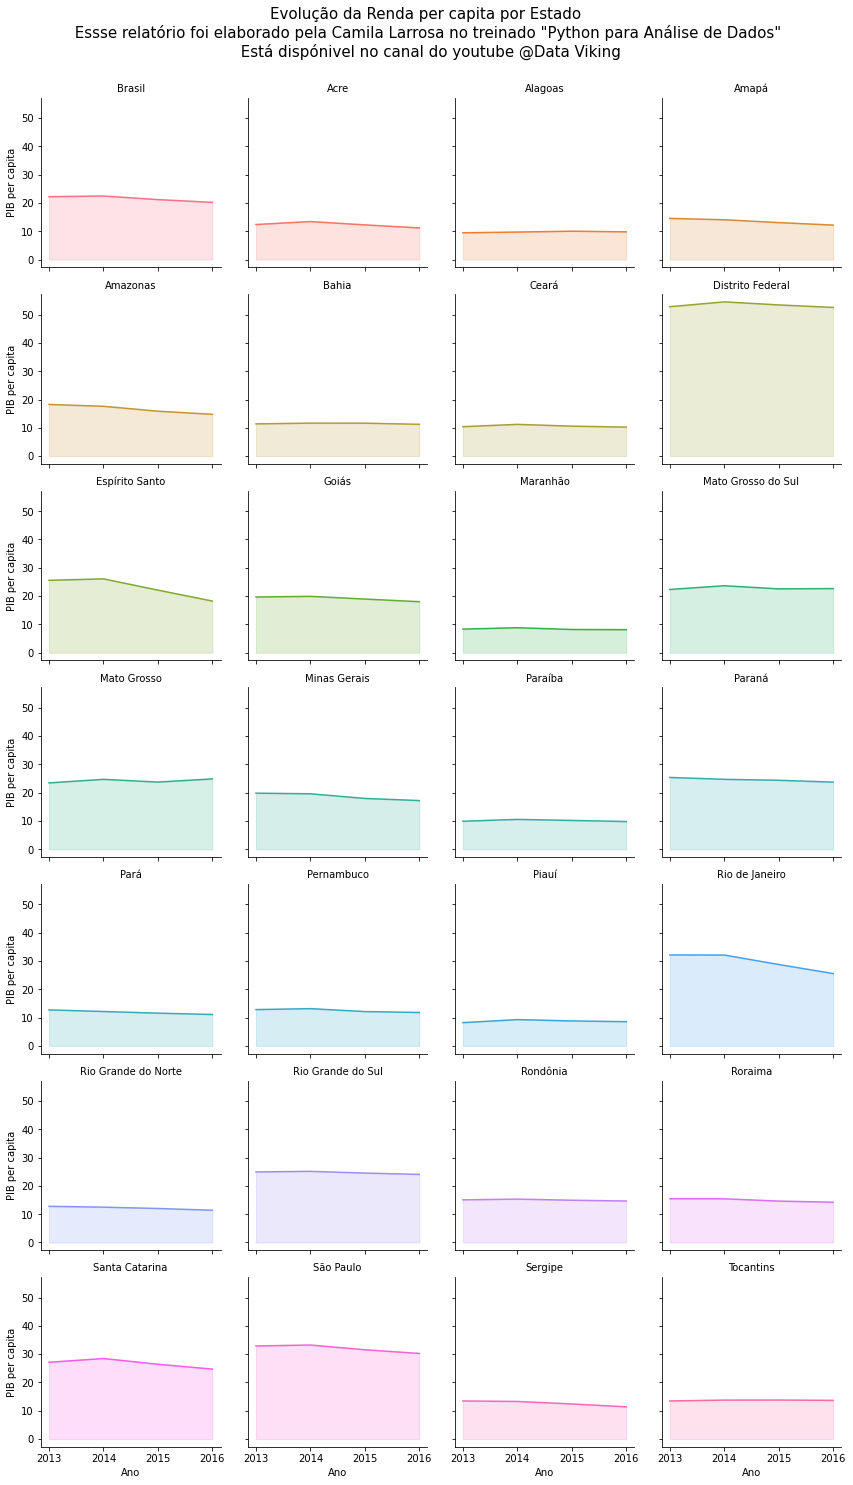

In [7]:
# Sistema de Grids

# Cor Fundo de Fundo
Cor_Fundo = '#f5f5f5' #cinza clarinho

# Criar o sistema de Grids
Grid_Graficos = sns.FacetGrid( Base_Dados, col='Territorialidades', hue='Territorialidades', col_wrap=4 )
#   o FaceGrid calculou automático qntas linhas eu precisava
#   para o meu conj de dados "Territorialidades", usando 4 colunas
#   como o ordenado por mim col_wrap = 4
#   são 27 territórios, divididos por 4. Precisam de 7 linhas


# Adicionar grafico linhas em cada gráfico
Grid_Graficos = Grid_Graficos.map( plt.plot, 'Ano', 'PIB per capita')

# Adiconar uma sombra da linha pra baixo(plt.fill_between) + Ajuste do titulo
Grid_Graficos = Grid_Graficos.map( plt.fill_between,  'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} Territorialidades')

# Filtrar o titulo (tirar o Territorialidades)
Grid_Graficos = Grid_Graficos.set_titles('{col_name}')

# Adicionar um subtitulo
Grid_Graficos = Grid_Graficos.fig.suptitle(
    'Evolução da Renda per capita por Estado \n Essse relatório foi elaborado pela Camila Larrosa no treinado "Python para Análise de Dados" \n Está dispónivel no canal do youtube @Data Viking',
    fontsize=15
)

# Ajustando
plt.subplots_adjust( top=0.92 )